<a href="https://colab.research.google.com/github/FahimShahriarAnik/TB-detection-using-CNN/blob/main/TB_Detection(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#soumma
#%cd /content/drive/MyDrive/BUET/Project/TB_Detection (CSE472-ML)

#anik
%cd /content/drive/MyDrive/academic things/4-2/TB_Detection (CSE472-ML)

/content/drive/.shortcut-targets-by-id/1kCmCV8gHHNQAr1qc9HqLluDTKZBPbtJX/TB_Detection (CSE472-ML)


In [ ]:
!ls

 TB_Chest_Radiography_Database	'TB Detection - CSE 472 Project.gsheet'
'TB-Detection(CNN).ipynb'	 TB_MLproject.zip


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageStat
import cv2

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn           as sns
from sklearn.metrics         import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import imageio as im
from keras import layers
from keras import models
from keras.models            import Sequential
from keras.layers            import Conv2D
from keras.layers            import MaxPooling2D
from keras.layers            import Dense
from keras.layers            import Flatten
from keras.layers import Dropout



from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import callbacks
from functools import reduce
import os
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
base_dir= "./TB_Chest_Radiography_Database/"
tuberculosis_data = './TB_Chest_Radiography_Database/Tuberculosis/'
normal_data = './TB_Chest_Radiography_Database/Normal/'
os.listdir(tuberculosis_data)[:10] 

['Tuberculosis-139.png',
 'Tuberculosis-140.png',
 'Tuberculosis-136.png',
 'Tuberculosis-157.png',
 'Tuberculosis-120.png',
 'Tuberculosis-1.png',
 'Tuberculosis-126.png',
 'Tuberculosis-133.png',
 'Tuberculosis-111.png',
 'Tuberculosis-128.png']

Testing Purpose

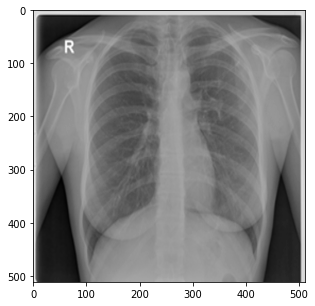

In [ ]:
# Reading the input image
img = cv2.imread(tuberculosis_data+'Tuberculosis-675.png')

# Converting to gray scale image from 3 channels to single channel
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(gray_img,cmap="gray")

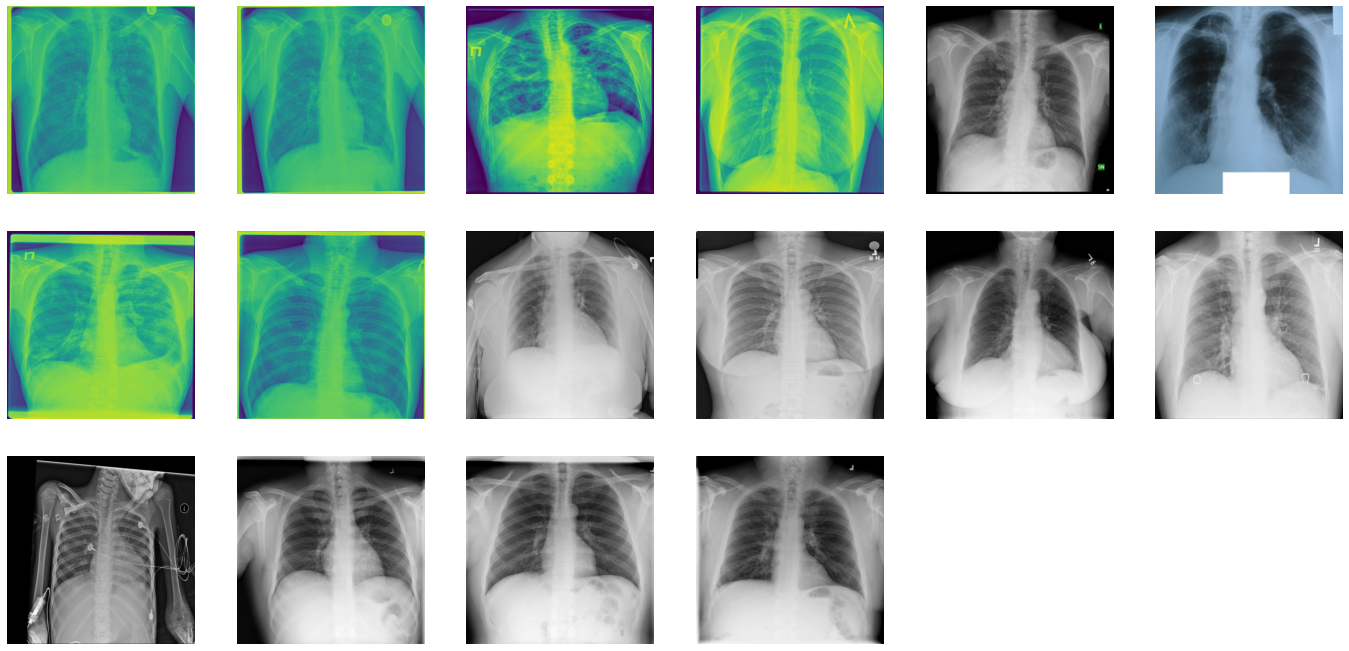

In [ ]:
nrows= 5
ncols= 6
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tuberculosis_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

Generating Training Data,validation data

In [ ]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.2,  width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True,  validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir, 
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )
# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(base_dir, 
                                              target_size= (64,64),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 3360 images belonging to 2 classes.

validation data :
Found 840 images belonging to 2 classes.


# **Model-1**

In [ ]:
#1 model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64,64,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9, 9), activation='relu',input_shape=(64,64,3))) #secondlayer
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Flatten())


model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 64)) 
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [ ]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
105/105 [==============================] - 859s 8s/step - loss: 0.4073 - accuracy: 0.8452 - val_loss: 0.5254 - val_accuracy: 0.8548
Epoch 2/15
105/105 [==============================] - 53s 507ms/step - loss: 0.2762 - accuracy: 0.9158 - val_loss: 0.5557 - val_accuracy: 0.8560
Epoch 3/15
105/105 [==============================] - 53s 505ms/step - loss: 0.2982 - accuracy: 0.9003 - val_loss: 0.3979 - val_accuracy: 0.8631
Epoch 4/15
105/105 [==============================] - 53s 510ms/step - loss: 0.2212 - accuracy: 0.9238 - val_loss: 0.3017 - val_accuracy: 0.8560
Epoch 5/15
105/105 [==============================] - 54s 515ms/step - loss: 0.2132 - accuracy: 0.9247 - val_loss: 0.3551 - val_accuracy: 0.8631
Epoch 6/15
105/105 [==============================] - 53s 504ms/step - loss: 0.2051 - accuracy: 0.9232 - val_loss: 0.2800 - val_accuracy: 0.8583
Epoch 7/15
105/105 [==============================] - 53s 505ms/step - loss: 0.1971 - accuracy: 0.9170 - val_loss: 0.2490 - val_accu

Save the model

In [ ]:
model.save('saved_model/model-1.h5')

Get The model

In [ ]:
model = tf.keras.models.load_model('./saved_model/model-1.h5')

In [ ]:
len(train_data[0][0][0][0][0])   #105x2x32x64x64x3

3

In [ ]:
train_data[0][0][0][0][0]

array([0.24830505, 0.26762706, 0.3050249 ], dtype=float32)